In [11]:
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# --- Add project root to path ---
import sys
import os
# Prepend project root to take precedence
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
# --------------------------------

In [ ]:
# ### Alternate way to set path ###
# # Get the path to the current notebook's directory (analysis/)
# notebook_dir = os.path.abspath(os.path.dirname(__file__))

# # Go up one directory to reach the project root (openmc-fluc-decomposition/)
# project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# # Add the project root to sys.path
# if project_root not in sys.path:
#     sys.path.append(project_root)

# print(f"Project root added to path: {project_root}")

In [ ]:
from analysis.common_plotting import plot_phir_slice, plot_phir_slice_log
from src.flux_decomp.processing import load_tally_data, create_individual_source_matrices, save_mesh_data_as_npz, save_full_source_data_as_npz, save_individual_source_matrices_as_npz

In [ ]:
# --- 1. Setup ---
SP_FILE = '../data/run_full_source_flat/statepoint.100.h5'
TALLY_NAME = 'cyl_tally'
Z_SLICE_INDEX = 1 

# --- 2. Load Full Source Data ---
mean_full_source_data, mesh = load_tally_data(SP_FILE, TALLY_NAME, 'mean', True)
stdev_full_source_data, _ = load_tally_data(SP_FILE, TALLY_NAME, 'std_dev', True)

# --- 3. Extract Energy Groups ---
ENERGY_BIN_INDEX = 0 # 0 = Thermal, 1 = Fast
mean_thermal_all_sources = mean_full_source_data[ENERGY_BIN_INDEX].flatten(order='F')
stdev_thermal_all_sources = stdev_full_source_data[ENERGY_BIN_INDEX].flatten(order='F')

ENERGY_BIN_INDEX = 1 # Switch to Fast
mean_fast_all_sources = mean_full_source_data[ENERGY_BIN_INDEX].flatten(order='F')
stdev_fast_all_sources = stdev_full_source_data[ENERGY_BIN_INDEX].flatten(order='F')

# --- 4. Create Individual Source Matrices ---
flux_matrices = create_individual_source_matrices(base_dir='data/run_individual_sources_flat', tally_name='cyl_tally')

# --- 5. Extract Matrices ---

mean_thermal_flux_matrix = flux_matrices['thermal_mean']
stdev_thermal_flux_matrix = flux_matrices['thermal_stdev']

mean_fast_flux_matrix = flux_matrices['fast_mean']
stdev_fast_flux_matrix = flux_matrices['fast_stdev']

num_sources = mean_thermal_flux_matrix.shape[1]

# --- 6. Save Data as .npz Files ---

save_mesh_data_as_npz(mesh, file_name='mesh_data.npz')
save_full_source_data_as_npz(mean_full_source_data, stdev_full_source_data, file_path='data/analysis_npz_files', mean_file_name='full_source_mean.npz', stdev_file_name='full_source_stdev.npz')
save_individual_source_matrices_as_npz(mean_fast_flux_matrix, mean_fast_flux_matrix, stdev_thermal_flux_matrix, stdev_fast_flux_matrix, 
                                       file_path='data/analysis_npz_files', thermal_mean_file_name_template='thermal_mean_matrix.npz', 
                                       fast_mean_file_name_template='fast_mean_matrix.npz', 
                                       thermal_stdev_file_name_template='thermal_stdev_matrix.npz', 
                                       fast_stdev_file_name_template='fast_stdev_matrix.npz')



Mesh data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/mesh_data.npz
Full source tally data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/full_source_mean.npz and /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/full_source_stdev.npz
Individual source tally data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/thermal_mean_matrix.npz, /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/fast_mean_matrix.npz, /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/thermal_stdev_matrix.npz, and /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/fast_stdev_matrix.npz


Text(0.5, 1.0, 'Individual Sources - Fast Flux (Z-slice 1)')

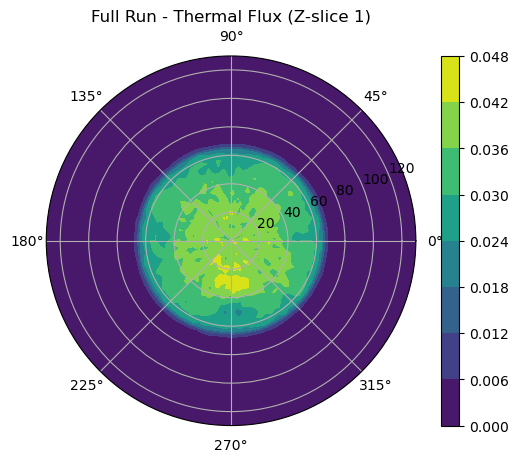

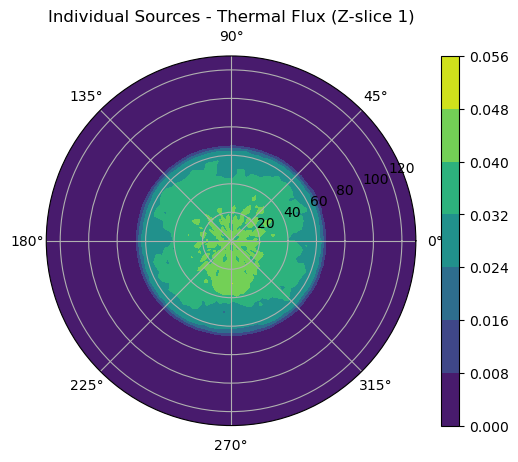

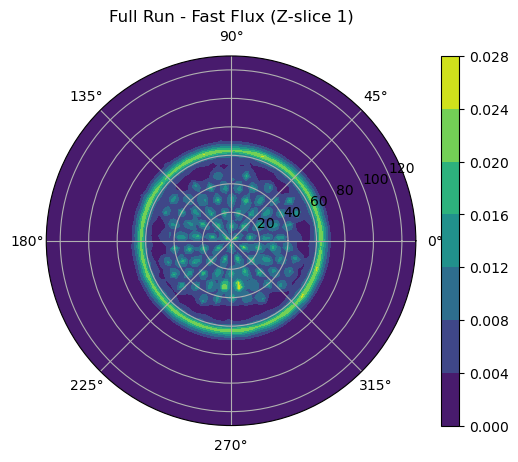

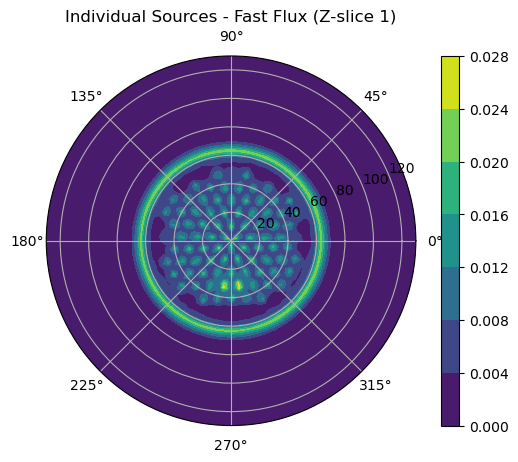

In [15]:
# --- 7. Plotting and Comparison ---

ENERGY_BIN_INDEX = 0 # 0 = Thermal, 1 = Fast
group_name = "Thermal" if ENERGY_BIN_INDEX == 0 else "Fast"

ax = plot_phir_slice(mean_thermal_all_sources, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Full Run - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
# output_filename = "full_run_thermal_flux_plot.png"
# plt.savefig(output_filename)
# print(f"Plot saved successfully to {output_filename}")

# print("Mean Thermal Flux Matrix Shape:", mean_thermal_flux_matrix.shape)
flux_from_ones_source_thermal = np.dot(mean_thermal_flux_matrix, np.ones(num_sources))
# print("Thermal Flux from Ones Source Shape:", flux_from_ones_source_thermal.shape)

ax = plot_phir_slice(flux_from_ones_source_thermal, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
# output_filename_individual = "individual_sources_thermal_flux_plot.png"
# plt.savefig(output_filename_individual)
# print(f"Plot saved successfully to {output_filename_individual}")

ENERGY_BIN_INDEX = 1 # Switch to Fast
group_name = "Thermal" if ENERGY_BIN_INDEX == 0 else "Fast"

ax = plot_phir_slice(mean_fast_all_sources, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Full Run - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
# output_filename = "full_run_fast_flux_plot.png"
# plt.savefig(output_filename)
# print(f"Plot saved successfully to {output_filename}")

# print("Mean Fast Flux Matrix Shape:", mean_fast_flux_matrix.shape)
flux_from_ones_source_fast = np.dot(mean_fast_flux_matrix, np.ones(num_sources))
# print("Fast Flux from Ones Source Shape:", flux_from_ones_source_fast.shape)

ax = plot_phir_slice(flux_from_ones_source_fast, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
# output_filename_individual = "individual_sources_fast_flux_plot.png"
# plt.savefig(output_filename_individual)
# print(f"Plot saved successfully to {output_filename_individual}")

In [16]:
# --- 8. Compute Differences ---
# Compute the difference between full source and individual source reconstructions
# Multiplying the matrix by a 1s column, should be equal to the all_sources tallies

flux_from_ones_source_thermal = np.dot(mean_thermal_flux_matrix, np.ones(num_sources))
flux_from_ones_source_fast = np.dot(mean_fast_flux_matrix, np.ones(num_sources))

thermal_means_diff = np.abs(mean_thermal_all_sources - flux_from_ones_source_thermal)
fast_means_diff = np.abs(mean_fast_all_sources - flux_from_ones_source_fast)

### Relative differences ###
# Initialize with NaN
thermal_rel_diff = np.full_like(thermal_means_diff, np.nan)

# Mask: where denominator ≠ 0
nonzero = mean_thermal_all_sources != 0
thermal_rel_diff[nonzero] = thermal_means_diff[nonzero] / np.abs(mean_thermal_all_sources[nonzero])

# Mask: both numerator and denominator == 0 → set to 0
both_zero = (mean_thermal_all_sources == 0) & (flux_from_ones_source_thermal == 0)
thermal_rel_diff[both_zero] = 0.0


# Initialize with NaN
fast_rel_diff = np.full_like(fast_means_diff, np.nan)

# Mask: where denominator ≠ 0
nonzero = mean_fast_all_sources != 0
fast_rel_diff[nonzero] = fast_means_diff[nonzero] / np.abs(mean_fast_all_sources[nonzero])

# Mask: both numerator and denominator == 0 → set to 0
both_zero = (mean_fast_all_sources == 0) & (flux_from_ones_source_fast == 0)
fast_rel_diff[both_zero] = 0.0

Text(0.5, 1.0, '(Log Scale) Relative Difference in Fast Means')

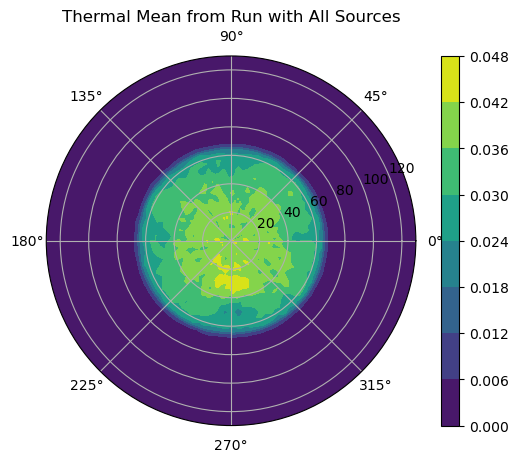

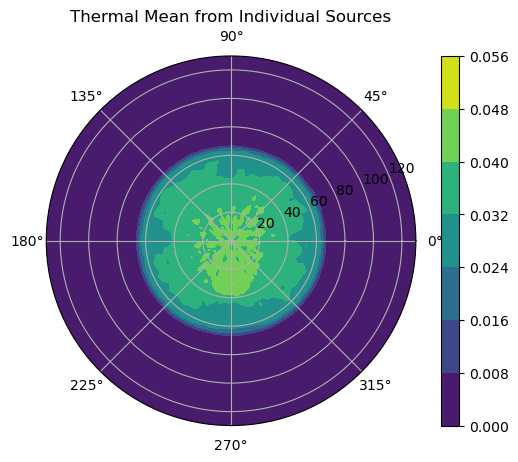

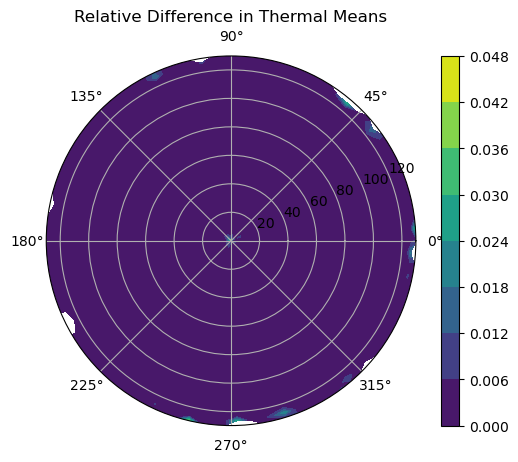

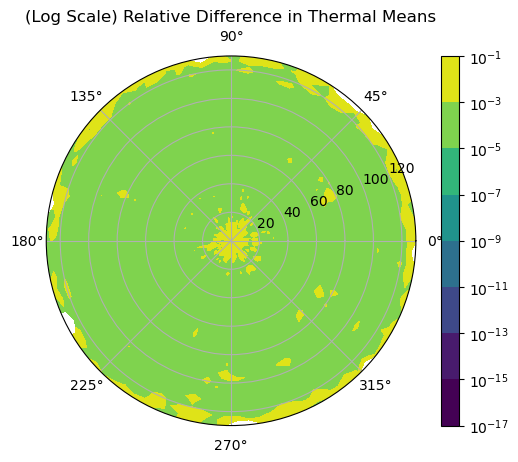

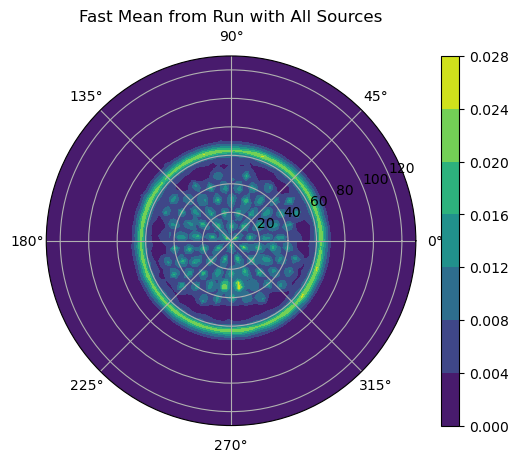

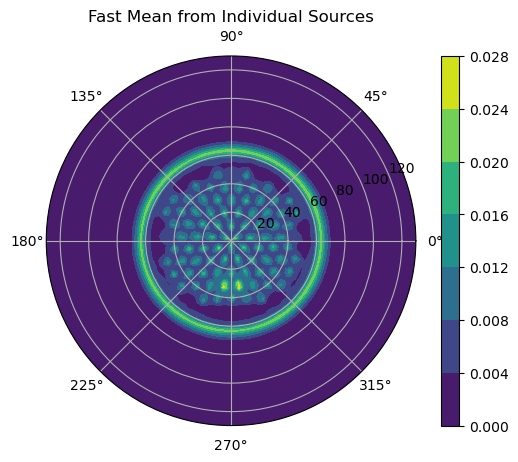

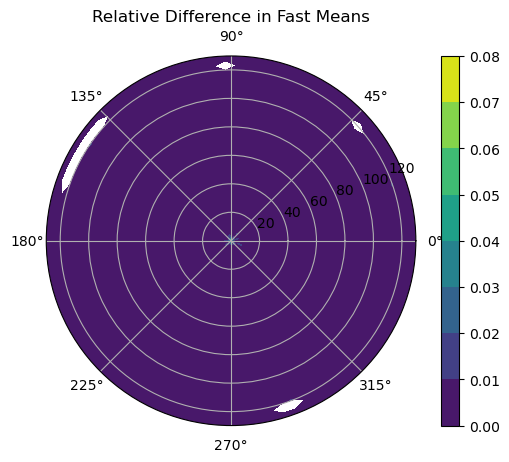

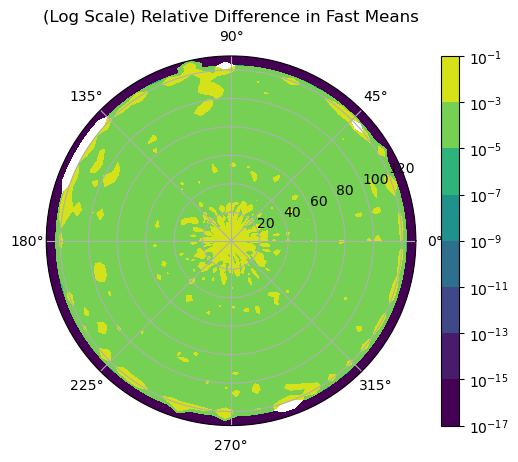

In [17]:
# --- 9. Plot Differences ---

ax = plot_phir_slice(mean_thermal_all_sources, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Thermal Mean from Run with All Sources")

ax = plot_phir_slice(flux_from_ones_source_thermal, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Thermal Mean from Individual Sources")

ax = plot_phir_slice(thermal_rel_diff, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Relative Difference in Thermal Means")

ax = plot_phir_slice_log(thermal_rel_diff, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("(Log Scale) Relative Difference in Thermal Means")

ax = plot_phir_slice(mean_fast_all_sources, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Fast Mean from Run with All Sources")

ax = plot_phir_slice(flux_from_ones_source_fast, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Fast Mean from Individual Sources")

ax = plot_phir_slice(fast_rel_diff, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Relative Difference in Fast Means")

ax = plot_phir_slice_log(fast_rel_diff, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("(Log Scale) Relative Difference in Fast Means")

In [18]:
# --- 10. Compute Singular Value Decomposition (SVD) of the Source Matrices ---
U_thermal_mean, s_thermal_mean, VT_thermal_mean = np.linalg.svd(mean_thermal_flux_matrix, full_matrices=False)
U_thermal_stdev, s_thermal_stdev, VT_thermal_stdev = np.linalg.svd(stdev_thermal_flux_matrix, full_matrices=False)
U_fast_mean, s_fast_mean, VT_fast_mean = np.linalg.svd(mean_fast_flux_matrix, full_matrices=False)
U_fast_stdev, s_fast_stdev, VT_fast_stdev = np.linalg.svd(stdev_fast_flux_matrix, full_matrices=False)

In [22]:
# --- 11. Examine Singular Values ---
# First singular value and vectors of thermal mean
sigma1 = s_thermal_mean[0]
u1 = U_thermal_mean[:, 0]   # First left singular vector (shape: num_tally_locs,)
v1 = VT_thermal_mean[0, :]  # First right singular vector (shape: num_sources,)

# First mode (rank-1 approximation of M)
thermal_mean_matrix_mode1 = sigma1 * np.outer(u1, v1)
thermal_mean_ones_source_mode1 = np.dot(thermal_mean_matrix_mode1, np.ones(num_sources))


# Second singular value and vectors of thermal mean
sigma2 = s_thermal_mean[1]
u2 = U_thermal_mean[:, 1]   # Second left singular vector (shape: num_tally_locs,)
v2 = VT_thermal_mean[1, :]  # Second right singular vector (shape: num_sources,)

# Second mode (rank-1 approximation of M)
thermal_mean_matrix_mode2 = sigma2 * np.outer(u2, v2)
thermal_mean_ones_source_mode2 = np.dot(thermal_mean_matrix_mode2, np.ones(num_sources))


thermal_mean_matrix_rank2 = thermal_mean_matrix_mode1 + thermal_mean_matrix_mode2
thermal_mean_ones_source_rank2 = np.dot(thermal_mean_matrix_rank2, np.ones(num_sources))

Text(0.5, 1.0, 'Full Rank Thermal Mean with One Source')

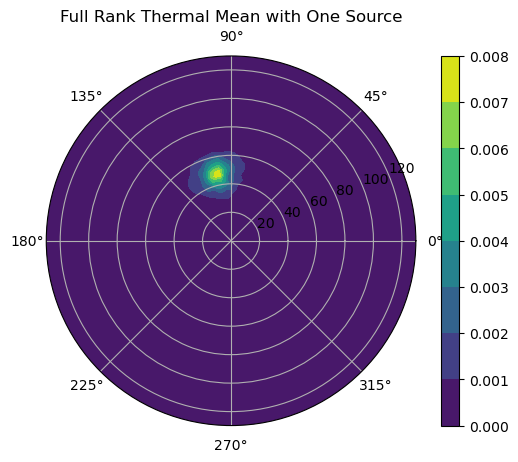

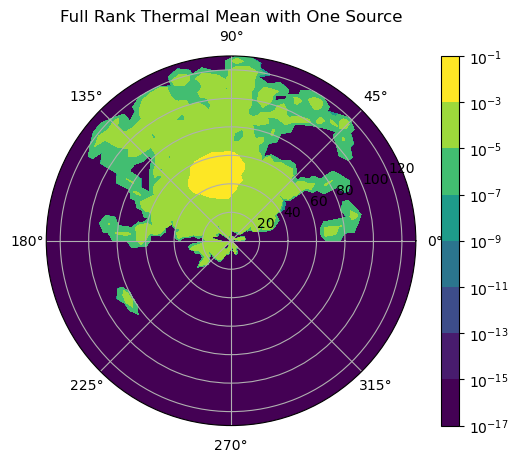

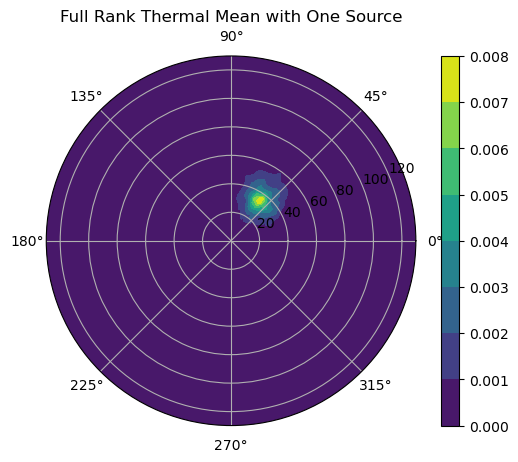

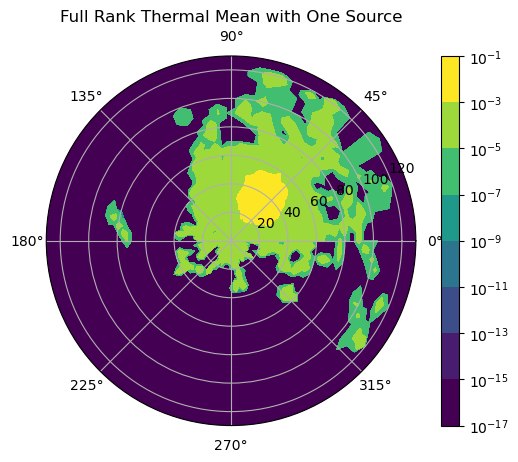

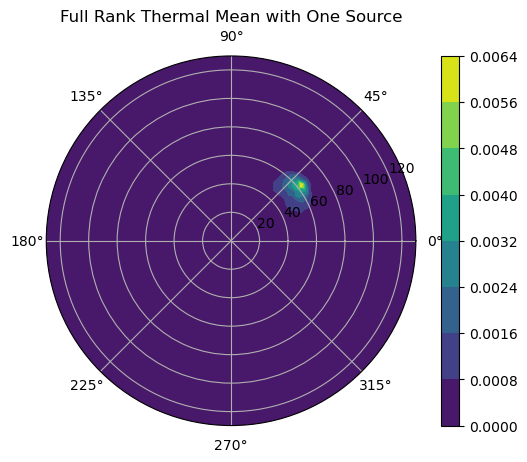

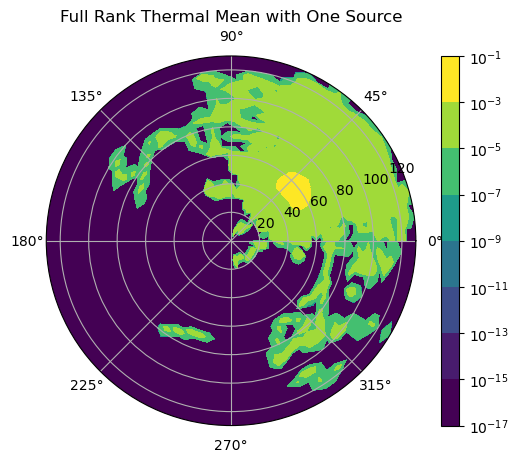

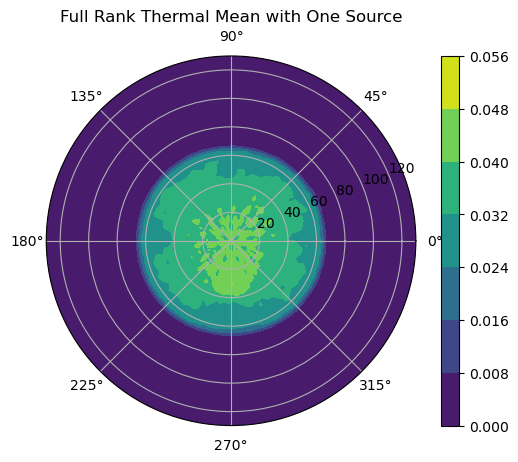

In [26]:
# -- 12. Plot Reconstructions from Different Ranks ---
# Full rank thermal mean with one source at location 0
one_unit_vector = np.zeros(num_sources)
one_unit_vector[0] = 1
one_source_tally = np.dot(mean_thermal_flux_matrix, one_unit_vector)

ax = plot_phir_slice(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Full Rank Thermal Mean with One Source")
ax_log = plot_phir_slice_log(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title("Full Rank Thermal Mean with One Source")

# Full rank thermal mean with one source at location 15
one_unit_vector = np.zeros(num_sources)
one_unit_vector[15] = 1
one_source_tally = np.dot(mean_thermal_flux_matrix, one_unit_vector)

ax = plot_phir_slice(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Full Rank Thermal Mean with One Source")
ax_log = plot_phir_slice_log(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title("Full Rank Thermal Mean with One Source")

# Full rank thermal mean with one source at location 100
one_unit_vector = np.zeros(num_sources)
one_unit_vector[100] = 1
one_source_tally = np.dot(mean_thermal_flux_matrix, one_unit_vector)

ax = plot_phir_slice(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Full Rank Thermal Mean with One Source")
ax_log = plot_phir_slice_log(one_source_tally, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title("Full Rank Thermal Mean with One Source")


# Plot reconstructions from different ranks
ax = plot_phir_slice(flux_from_ones_source_thermal, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title("Full Rank Thermal Mean with One Source")

# ax = plot_phir_slice(thermal_mean_matrix_mode1, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
# ax.set_title("Mode 1 Thermal Mean with Ones Source")

# ax = plot_phir_slice(thermal_mean_matrix_mode2, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
# ax.set_title("Mode 2 Thermal Mean with Ones Source")

# ax = plot_phir_slice(thermal_mean_matrix_rank2, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
# ax.set_title("Rank 2 Thermal Mean with Ones Source")